In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # time series
# time_series = pd.DataFrame(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
# time_series = time_series.cumsum()

# # generic dataset
# ds = pd.DataFrame({'A':np.random.randn(10000), 'B':np.random.randn(10000), 'C':np.random.randn(10000), 'D':np.random.randn(10000)*3})

# ds_cumsum = ds.cumsum() # cumulative sum of generic dataset
# ds_cumsum['index'] = list(range(len(ds_cumsum)))
# small_ds = ds.sample(10) # small sample of generic dataset

# # ds with only natural numbers
# A = np.random.randint(0, 100, 100)
# B = np.random.randint(0, 100, 100)
# C = np.random.randint(0, 100, 100)
# ds_natural = pd.DataFrame({'A':A,'B':B,'C':C})
# ds_natural
# ds_natural_cumsum = ds_natural.cumsum()
# ds_natural_small = ds_natural.sample(10)

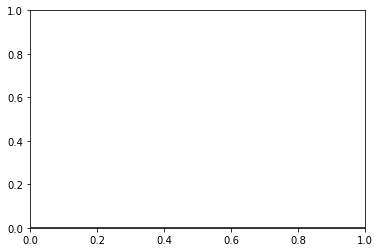

In [3]:
plt.figure()
# ds.iloc[2].plot.bar()
plt.axhline(0, color='k')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
import torch
import torch.nn as nn
import torch.nn.functional as F 
from matplotlib.ticker import StrMethodFormatter

In [5]:
# seed = 29
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# os.environ["PYTHONHASHSEED"] = str(seed)

# Define data path
DATA_PATH = ''
prev_value_map = {}

In [19]:
df = pd.read_csv(DATA_PATH + 'all_stays.csv') 
df = df[['SUBJECT_ID', 'LOS', 'MORTALITY']]
df['SUBJECT_ID'] = df['SUBJECT_ID'].astype(int)
df['LOS'] = df['LOS'].astype(float).apply(np.ceil)
df['MORTALITY'] = df['MORTALITY'].astype(int)
# df2 = df.iloc[0:100]
# df.set_index(["LOS"]).count(level="SUBJECT_ID")
# df.plot(kind='hist', bins=20)

df3 = df.groupby('LOS')['SUBJECT_ID'].count()
df3

LOS
1.0       6954
2.0      14075
3.0       7616
4.0       4026
5.0       2411
         ...  
87.0         1
88.0         1
92.0         1
99.0         1
117.0        1
Name: SUBJECT_ID, Length: 75, dtype: int64

In [20]:
#total_rows_half = np.floor(len(df3)/2).astype(int)
# df_1 = df3.iloc[0:total_rows_half]
# df_2 = df3.iloc[total_rows_half+1:]

df_1 = df3.iloc[0:20]
df_2 = df3.iloc[21:]
print(type(df_1))

<class 'pandas.core.series.Series'>


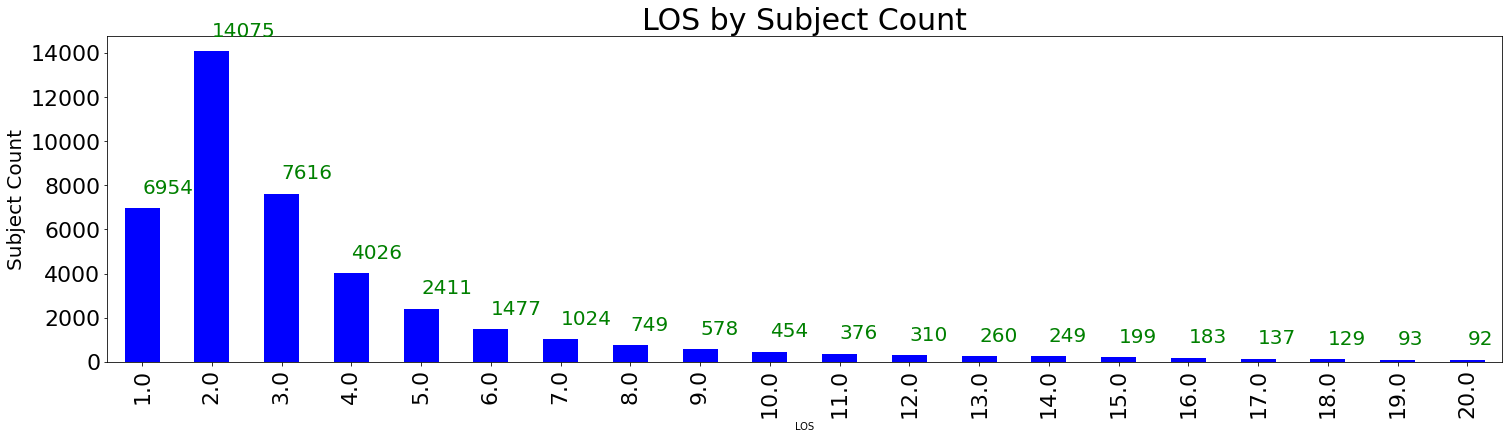

In [8]:
plt.ylabel('Subject Count', size = 20)
plt.title('LOS by Subject Count', size = 30)
ax = df_1.plot(kind='bar', x='LOS', y='val', color = "blue", fontsize='22', figsize=(25, 6))
for idx, label in enumerate(list(df_1.index)): 
    value = df_1[label]
    ax.annotate(df_1[label],
                (idx, value),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 size=20, 
                 color='green')
#plt.savefig('LOSCount.png')    

In [9]:
plt.savefig('LOSBySubjectCount.png')

<Figure size 432x288 with 0 Axes>

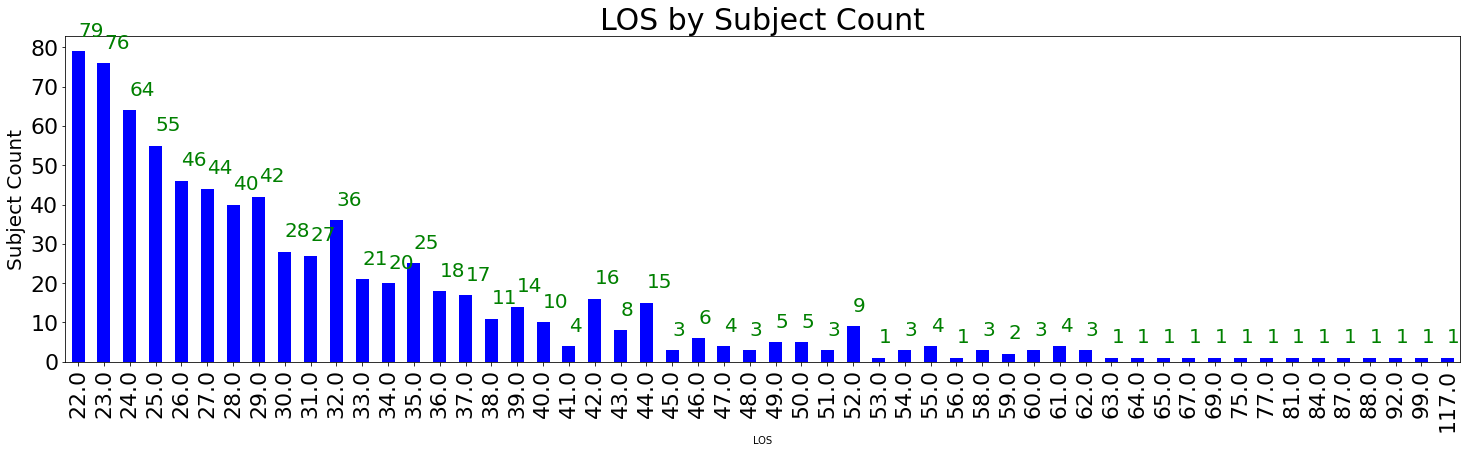

In [10]:
plt.ylabel('Subject Count', size = 20)
plt.title('LOS by Subject Count', size = 30)
ax = df_2.plot(kind='bar', x='LOS', y='val', color = "blue", fontsize='22', figsize=(25, 6))
for idx, label in enumerate(list(df_2.index)): 
    value = df_2[label]
    ax.annotate(value,
                (idx, value),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 size=20, 
                 color='green')
plt.savefig('books_read.png')

In [11]:
#df_1.plot.pie(subplots=True, figsize=(16, 8));

In [12]:
df3

LOS
1.0       6954
2.0      14075
3.0       7616
4.0       4026
5.0       2411
         ...  
87.0         1
88.0         1
92.0         1
99.0         1
117.0        1
Name: SUBJECT_ID, Length: 75, dtype: int64

In [13]:
frame = { 'PERCENTAGE': df3}
  
df4 = pd.DataFrame(frame)
df4['PERCENTAGE'] = ((df4[['PERCENTAGE']]/df4.sum())*100).astype(float).apply(np.ceil)
print(type(df4))

<class 'pandas.core.frame.DataFrame'>


In [80]:
df4_1 = df4.iloc[0:20]['PERCENTAGE']
df4_2 = df4.iloc[21:]['PERCENTAGE']
#print(df4_2)

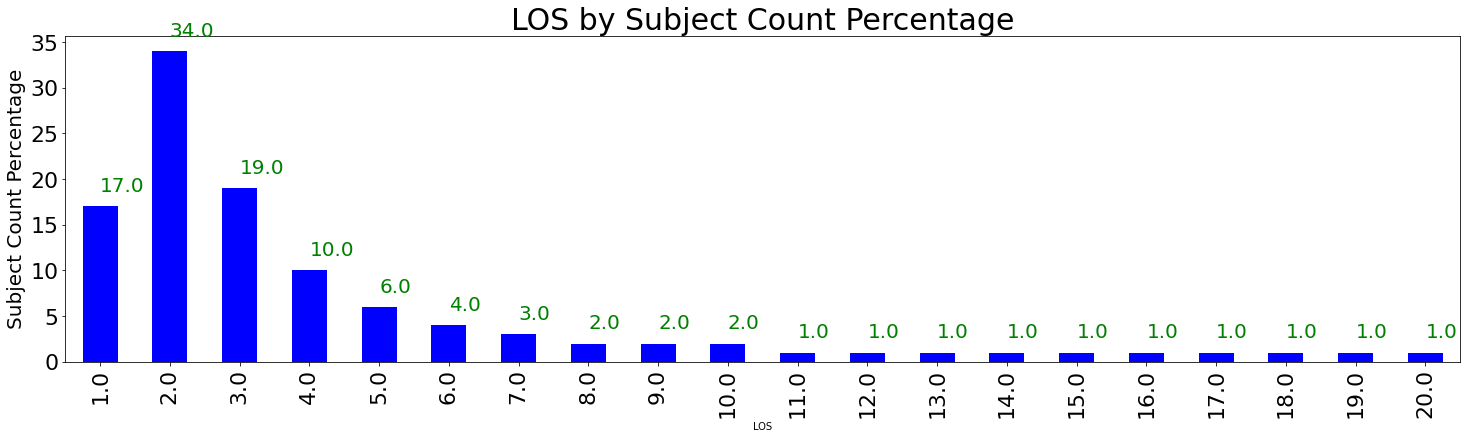

In [81]:
plt.ylabel('Subject Count Percentage', size = 20)
plt.title('LOS by Subject Count Percentage', size = 30)
ax = df4_1.plot(kind='bar', x='PERCENTAGE', color = "blue", fontsize='22', figsize=(25, 6))
for idx, label in enumerate(list(df4_1.index)): 
    value = df4_1[label]
    ax.annotate(value,
                (idx, value),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 size=20, 
                 color='green')
plt.show()

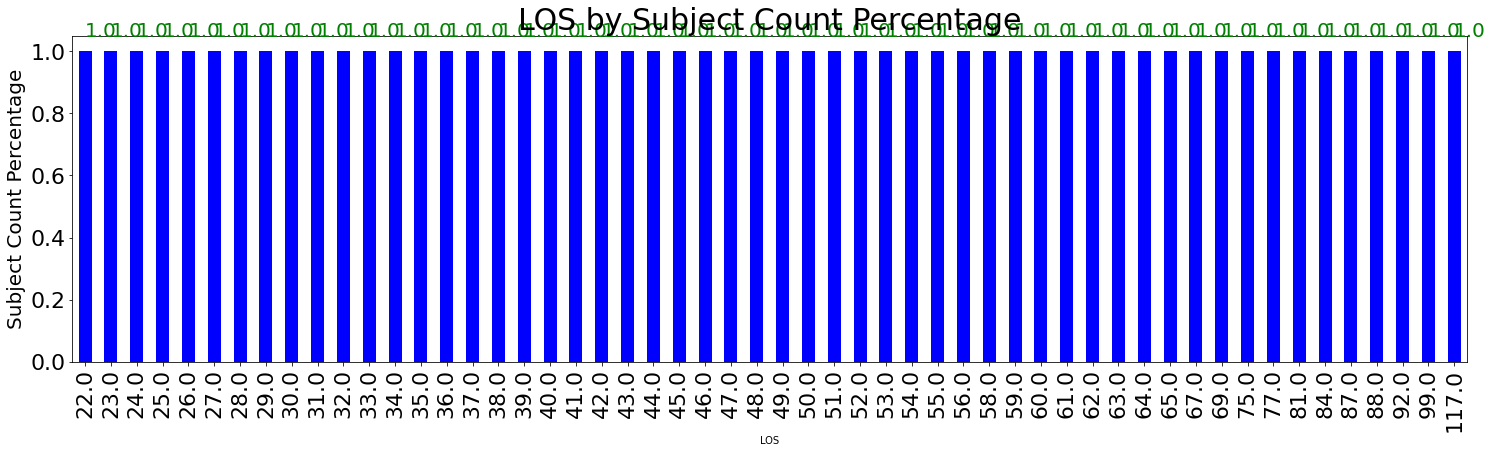

In [82]:
plt.ylabel('Subject Count Percentage', size = 20)
plt.title('LOS by Subject Count Percentage', size = 30)
ax = df4_2.plot(kind='bar', x='PERCENTAGE', color = "blue", fontsize='22', figsize=(25, 6))
for idx, label in enumerate(list(df4_2.index)): 
    value = df4_2[label]
    ax.annotate(value,
                (idx, value),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 size=20, 
                 color='green')
plt.show()

In [84]:
df5 = df.groupby('LOS')['SUBJECT_ID'].count()
df5 = df.groupby(['LOS']).agg({'SUBJECT_ID': ['count'], 'MORTALITY': ['sum']})
df5.columns = ['COUNT', 'MCOUNT']
#df5

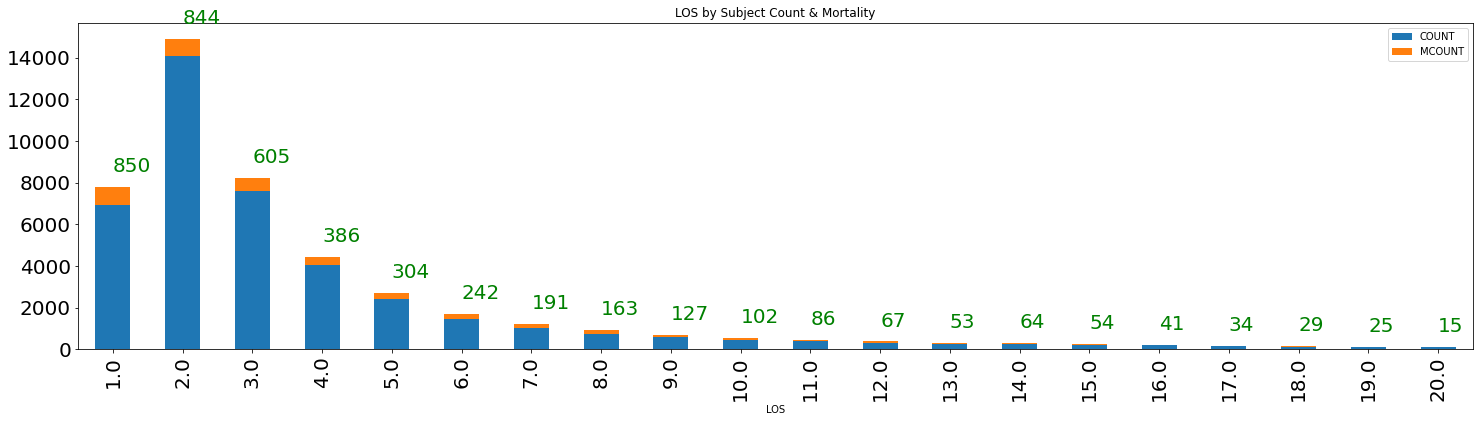

In [86]:
df5_1 = df5.iloc[0:20]
# plt.ylabel('Subject Count Percentage', size = 20)
# plt.title('LOS by Subject Count Percentage', size = 30)

ax5 = df5_1.plot.bar(stacked=True, fontsize='20', figsize=(25, 6), title='LOS by Subject Count & Mortality')
# ax5 = df5_1.plot(kind='bar', stacked=True, color = "blue", fontsize='22', figsize=(25, 6))

for idx, label in enumerate(list(df5_1.index)): 
    c1 = df5_1.iloc[idx]['COUNT']
    c2 = df5_1.iloc[idx]['MCOUNT']
    ax5.annotate(c2,
                (idx, (c1 + c2)),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 size=20, 
                 color='green')